## Sociale media en studieresultaten
We willen nagaan of er een verband bestaat tussen het gebruik van sociale media en de prestaties van
studenten.
We vragen aan 1064 studenten hoeveel uren ze gemiddeld per dag met sociale media bezig zijn. Onder
sociale media verstaan we Facebook, YouTube, blogs, Twitter, MySpace en LinkedIn.
We gaan ook na wat de eindscore is van deze studenten op het einde van het jaar.
Het resultaat van deze enquête vind je in het bestand "socialeMediaVsPunten.csv".

## Setup

1. Lees dit bestand in. Let erop dat het aantal uren als getallen wordt gelezen. Verwijder de rijen waar
een onbekende waarde staat. Verwijder nu de rijen met uitschieters (maak eventueel gebruik van de hulpfuncties.py uit de oefeningen van centrummaten). Hoeveel rijen schieten er over?

In [30]:
import pandas as pd

socialeMedia = pd.read_csv('data/socialeMediaVsPunten.csv', sep=',', decimal='.', na_values=['onbekend'])

socialeMedia = socialeMedia.dropna()
socialeMedia.dropna(inplace=True)

socialeMedia['uren'] = socialeMedia['uren'].astype(float)

Q1P = socialeMedia['punten'].quantile(0.25)
Q3P = socialeMedia['punten'].quantile(0.75)
IQRP = Q3P - Q1P

Q1U = socialeMedia['uren'].quantile(0.25)
Q3U = socialeMedia['uren'].quantile(0.75)
IQRU = Q3U - Q1U

socialeMedia = socialeMedia[(socialeMedia['punten'] >= Q1P - 1.5 * IQRP) & (socialeMedia['punten'] <= Q3P + 1.5 * IQRP)]
socialeMedia = socialeMedia[(socialeMedia['uren'] >= Q1U - 1.5 * IQRU) & (socialeMedia['uren'] <= Q3U + 1.5 * IQRU)]


socialeMedia.reset_index(drop=True, inplace=True) # De index resetten
display(socialeMedia)
print(len(socialeMedia))

,uren,punten
0,0.70,15
1,0.68,18
2,1.50,14
3,2.40,6
4,0.00,18
...,...,...
1051,2.64,15
1052,1.58,11
1053,1.53,18
1054,0.80,16


1056


2. Maak een histogram van de uren en de punten apart

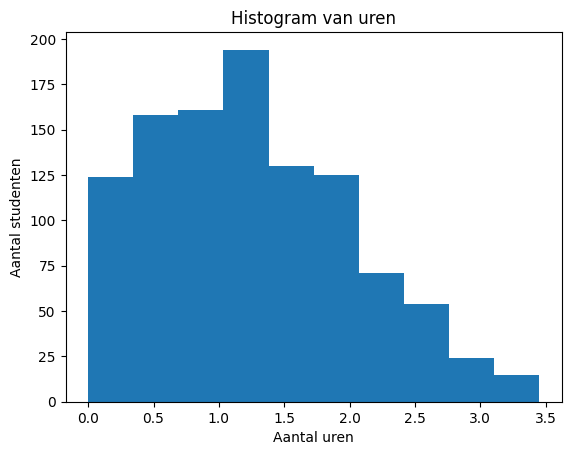

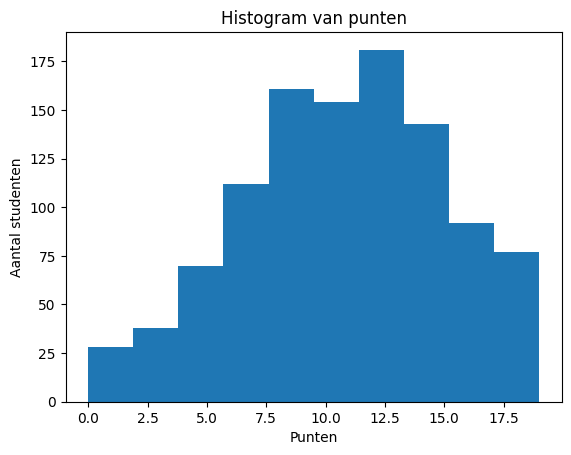

In [31]:
import matplotlib.pyplot as plt

plt.hist(socialeMedia['uren'], bins=10)
plt.title('Histogram van uren')
plt.xlabel('Aantal uren')
plt.ylabel('Aantal studenten')
plt.show()

plt.hist(socialeMedia['punten'], bins=10)
plt.title('Histogram van punten')
plt.xlabel('Punten')
plt.ylabel('Aantal studenten')
plt.show()

3. Wat is het gemiddeld aantal uren dat een student aan sociale media spendeert?

In [32]:
gemiddeld = socialeMedia['uren'].mean()
print(gemiddeld)

1.2641003787878786


4. Wat is de standaardafwijking van het aantal uren? Wat betekent dit?

In [33]:
standaardafwijking = socialeMedia['uren'].std()
print(standaardafwijking)
# De standaardafwijking van het aantal uren geeft aan hoeveel de uren variëren ten opzichte van het gemiddelde aantal uren.

0.7578163599528441


5. Wat is de gemiddelde score van de studenten?


In [34]:
gemiddeld = socialeMedia['punten'].mean()
print(gemiddeld)

10.8125


6. Wat is de standaardafwijking van de score?



In [35]:
standaardafwijking = socialeMedia['punten'].std()
print(standaardafwijking)

4.495903875614754


7. Maak een scatterplot van de 2 variabelen. Welke correlatie verwacht je?

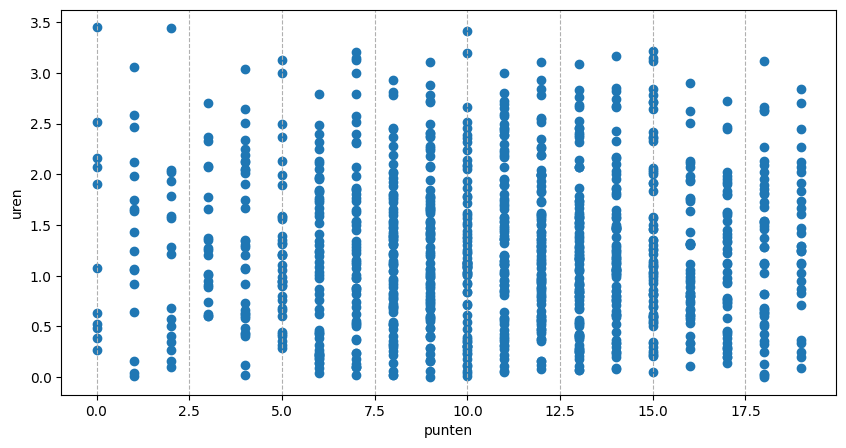

In [38]:
# Hoe langer je op de telefoon zit, hoe slechter je punten.

import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(socialeMedia.punten, socialeMedia.uren)
ax.set_xlabel('punten')
ax.set_ylabel('uren')
_=ax.grid(linestyle='--', axis='x')
# Er is geen lineair verband, maar er kan wel een ander soort verband zijn.

8. Bereken de correlatie tussen de 2 variabelen. Doe dit ook eens via de Z-scores (Pearson). Wat
besluit je?

In [42]:
correlatie = socialeMedia['uren'].corr(socialeMedia['punten'])
print(correlatie)

# Er is geen lineair verband, maar er kan wel een ander soort verband zijn.
# (Hoe dichter het getal bij nul zit, hoe minder kans op een lineair verband)

-0.014669282578565843


9. Welke rangcorrelatie vind je volgens Kendall? Wat betekent deze waarde?

In [44]:
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

socialeMedia.corr(method = 'kendall')
# Er is hier een kleine correlatie (-0.006172), maar amper zichtbaar.
# Dus dit betekent dat mensen die langer op hun telefoon zitten minder goede punten halen, maar dit is zodanig laag dat ik het zelf zou negeren.

,uren,punten
uren,1.000000,-0.006172
punten,-0.006172,1.000000


10. Heeft het zin om hier een regressielijn te bepalen? Waarom wel/niet? Bepaal de regressielijn als dit
zin heeft

LinearRegression()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


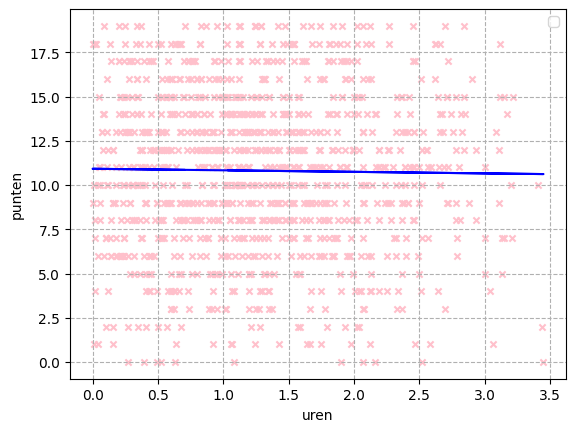

In [58]:
# Dit is niet logisch om te doen, omdat er geen lineair verband is dus met andere woorden, als Mensen langer op hun telefoon zitten, gaan hun punten ook niet erger worden.
# Dus niet logisch.

# Maar hieronder toch nog eventjes voor de lol :-)
# Met een beetje meer kleur enzo hihihihi :-)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = socialeMedia[['uren']]
y = socialeMedia.punten

model.fit(X, y)

y_hat=model.predict(X) # voor spellingen maken

ax = socialeMedia.plot(kind='scatter', x='uren', y='punten', marker='x', color='pink')
ax.plot(socialeMedia.uren, y_hat, color='b')
ax.grid(linestyle='--')
_=ax.legend()